In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fashion - MNIST 
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

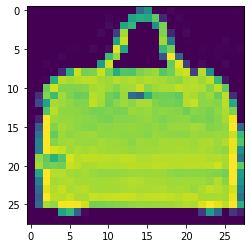

In [8]:
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

In [9]:
train_labels[220]

8

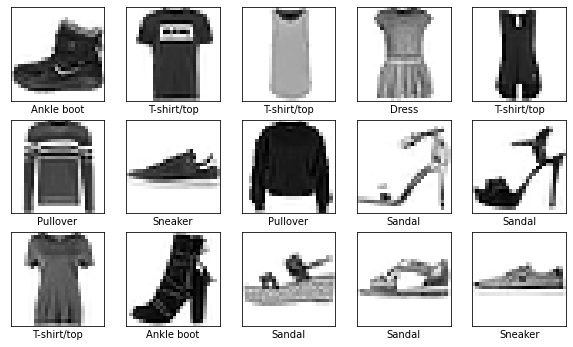

In [10]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [12]:
train_images_norm = train_images / 255.0

In [13]:
test_images_norm = test_images / 255.0

Let us now create convolutional layers for our CNN model


In [14]:
#First convolutional Layer

conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

In [15]:
#Second convolutional Layer

conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [16]:
#Third convolutional Layer

conv3 = layers.Conv2D(128, (3,3), activation='relu')

Let us create a Max Pooing Layer

In [17]:
#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

Let us create a Fully Connected Layer (Hidden Layer) and an Output Layer to perform Classification

In [18]:
# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()

In [19]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')

In [20]:
#Output Layer

output = layers.Dense(10, 'softmax')

Let us now create the model (CNN model) structure using the above defined layers

In [21]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images_norm, train_labels, epochs=20, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3673 - accuracy: 0.8678 - val_loss: 0.2809 - val_accuracy: 0.8960
Epoch 2/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2253 - accuracy: 0.9167 - val_loss: 0.2241 - val_accuracy: 0.9165
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1708 - accuracy: 0.9371 - val_loss: 0.2425 - val_accuracy: 0.9133
Epoch 4/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1260 - accuracy: 0.9533 - val_loss: 0.2342 - val_accuracy: 0.9212
Epoch 5/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0909 - accuracy: 0.9664 - val_loss: 0.2584 - val_accuracy: 0.9252
Epoch 6/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0669 - accuracy: 0.9753 - val_loss: 0.2734 - val_accuracy: 0.9202
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0476 - accuracy: 0.9826 - val_loss: 0.3349 - val_accuracy:

In [25]:
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7005 - accuracy: 0.9101


In [26]:
print(test_accuracy)

0.910099983215332


We observe from above that the model is overfitting (Training Accuracy - 99% ; Test Accuracy - 92%)

Need to apply Dropout

In [27]:
# Creating first dropout layer (for the first Conv. layer 'conv1')
drop_1 = keras.layers.Dropout(0.5)
# Creating second dropout layer (for the second Conv. layer 'conv2')
drop_2 = keras.layers.Dropout(0.5)
# Creating third dropout layer (for the third Conv. layer 'conv3')
drop_3 = keras.layers.Dropout(0.5)

In [28]:
fc_new = layers.Dense(128, activation='relu')

In [29]:
output_new = layers.Dense(10, 'softmax')

In [30]:
# Let us create a new neural network by applying these above created Dropout Layers to the respecive convolutional Layers 

# Please note that the Dropout layer for all the convolutional layers will be applied after the pooling layer (max. pool layer)

new_model = models.Sequential()

new_model.add(conv1)
# No Pooling Layer and Dropout layer for first Convolutional layer 'conv1'
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc_new)
new_model.add(output_new)

In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)        

In [32]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = new_model.fit(train_images_norm, train_labels, epochs=30, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4217 - accuracy: 0.8475 - val_loss: 0.2793 - val_accuracy: 0.8985
Epoch 2/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3001 - accuracy: 0.8881 - val_loss: 0.2485 - val_accuracy: 0.9092
Epoch 3/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2731 - accuracy: 0.8984 - val_loss: 0.2434 - val_accuracy: 0.9105
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2525 - accuracy: 0.9071 - val_loss: 0.2218 - val_accuracy: 0.9173
Epoch 5/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2389 - accuracy: 0.9106 - val_loss: 0.2215 - val_accuracy: 0.9188
Epoch 6/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2282 - accuracy: 0.9143 - val_loss: 0.2120 - val_accuracy: 0.9198
Epoch 7/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2214 - accuracy: 0.9165 - val_loss: 0.2094 - val_accuracy:

In [34]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2085 - accuracy: 0.9263


In [35]:
print(test_accuracy)

0.9262999892234802


In [36]:
print(test_loss)

0.20847904682159424


In [37]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


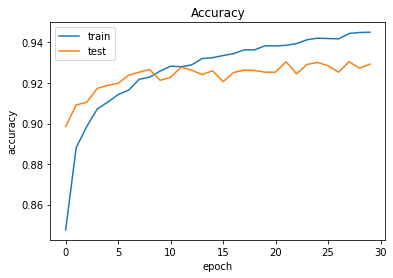

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

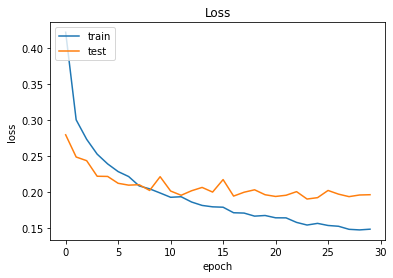

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Making predictions on Test dataset
predicted_test_labels = new_model.predict(test_images_norm)

In [41]:
predicted_test_labels.shape

(10000, 10)

In [42]:
predicted_test_labels[88]

array([9.99875069e-01, 1.96069418e-08, 6.79443983e-05, 5.67607094e-06,
       2.41610479e-07, 8.67408279e-09, 5.09540005e-05, 1.56753882e-13,
       4.47463684e-08, 1.28396354e-14], dtype=float32)

In [43]:
predicted_test_labels_index = np.argmax(predicted_test_labels[88])
predicted_test_labels_index

0

In [44]:
test_labels[88]

0

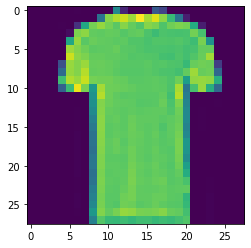

In [45]:
plt.figure()
plt.imshow(np.squeeze(test_images[88]))